In [1]:
import numpy as np # linear algebra
import pandas as pd 

## Dataset 1

In [2]:
df1 = pd.read_csv('./text_emotion.csv',encoding='latin-1')
df1.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


#### Dropping and renaming columns
Since these columns `tweet_id` and `author`  are not relevant to our analysis, I will drop them

To merge the data sets the columns need to have same column names

In [3]:
df1.drop(['tweet_id', 'author'], axis=1, inplace = True)

In [4]:
df1.rename(columns={"content": "Text"},inplace = True)

In [5]:
df1.head()

,sentiment,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df1['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

## Dataset 2:

In [7]:
df2 = pd.read_csv("./Emotion_final.csv")
df2.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df2.rename(columns={"Emotion": "sentiment"}, inplace= True)

In [9]:
df2.head()

,Text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
df2["sentiment"].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: sentiment, dtype: int64

## Combining Datasets

In [11]:
combine = [df1,df2]
data = pd.concat(combine)

In [12]:
data

,sentiment,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
21454,fear,Melissa stared at her friend in dism
21455,fear,Successive state elections have seen the gover...
21456,fear,Vincent was irritated but not dismay
21457,fear,Kendall-Hume turned back to face the dismayed ...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  61459 non-null  object
 1   Text       61459 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


There are no null values for each attribute

In [14]:
data['sentiment'].value_counts()

sadness       11430
neutral        8638
worry          8459
happy          7029
love           5483
happiness      5209
anger          3103
surprise       3066
fear           2652
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: sentiment, dtype: int64

#### Removing the `emtpy` from `sentiment`

In [15]:
#data.drop(data[data['sentiment'] == "empty" ].index, inplace = True)

In [16]:
data['sentiment'].value_counts()

sadness       11430
neutral        8638
worry          8459
happy          7029
love           5483
happiness      5209
anger          3103
surprise       3066
fear           2652
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: sentiment, dtype: int64

In [17]:
for i,s in enumerate(data['sentiment']):
    if s == 'worry':
        data.loc[i,'sentiment'] = 'fear'
    if s == 'happiness':
        data.loc[i,'sentiment'] = 'happy'
    if s == 'fun':
        data.loc[i,'sentiment'] = 'happy'
    if s == 'hate':
        data.loc[i,'sentiment'] = 'anger'
    if s == 'empty':
        data.loc[i,'sentiment'] = 'sadness'
    if s == 'enthusiasm':
        data.loc[i,'sentiment'] = 'happy'
    if s == 'boredom':
        data.loc[i,'sentiment'] = 'neutral'
    
    
    
    #drop relief, enthusiasm, boredom
#     if s == "relief" or s == 'enthusiasm' or s == 'boredom':
#         textEmo.drop(index=[i])
        

In [18]:
data['sentiment'].value_counts()

fear        16241
happy       13508
sadness      9796
neutral      8960
love         4720
anger        4069
surprise     2639
relief       1526
Name: sentiment, dtype: int64

In [19]:
data.to_csv("combined_data.csv", index = False)

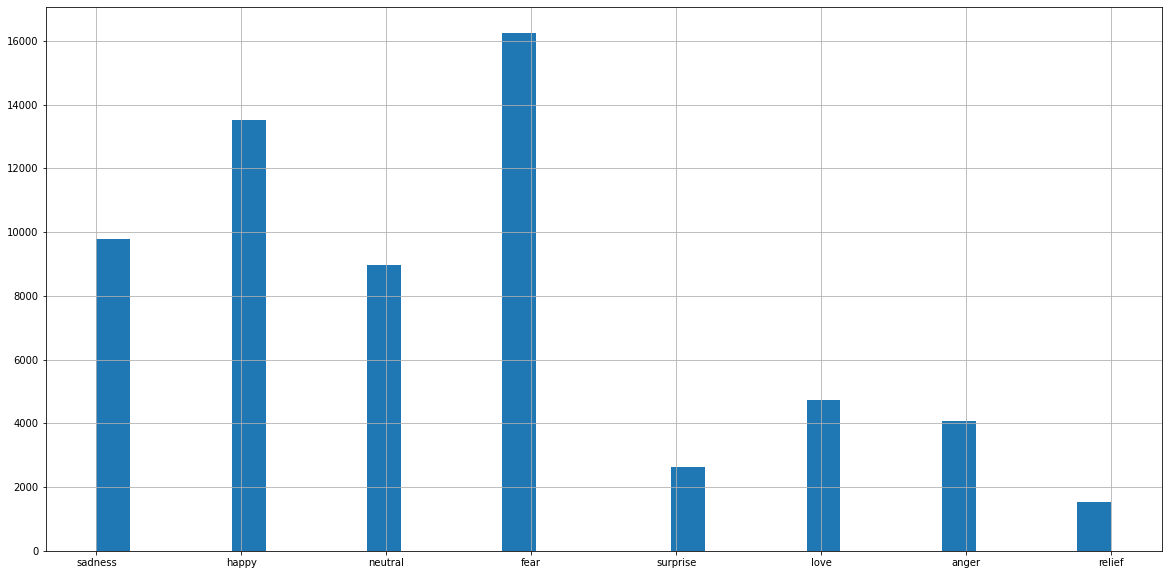

In [21]:
import matplotlib.pyplot as plt
hist = data['sentiment'].hist(bins=30,figsize=(20, 10))